In [ ]:
import pandas as pd
import pandas as pd        # For data manipulation
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt   # For basic plotting
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/Bangladesh-Crime-Dataset.csv")
print(df.head)

<bound method NDFrame.head of       Unnamed: 0  incident_month  incident_week incident_weekday  weekend  \
0              0               7             29        wednesday        0   
1              1               1              2        wednesday        0   
2              2               1              4          tuesday        0   
3              3               3              9           friday        1   
4              4               8             34         thursday        0   
...          ...             ...            ...              ...      ...   
6569        6569               3             10          tuesday        0   
6570        6570              10             42         saturday        1   
6571        6571               3             10          tuesday        0   
6572        6572               1              2        wednesday        0   
6573        6573               1              4          tuesday        0   

     part_of_the_day   latitude  longitude in

Droping Unnecessary columns


In [ ]:
df=df.drop(columns=["Unnamed: 0"])

In [ ]:
print(df.isnull().sum())

incident_month            0
incident_week             0
incident_weekday          0
weekend                   0
part_of_the_day           0
latitude                  0
longitude                 0
incident_place            0
incident_district         0
incident_division         0
max_temp                  0
avg_temp                  0
min_temp                  0
weather_code              0
precip                    0
humidity                  0
visibility                0
cloudcover                0
heatindex                 0
season                    0
household                 0
male_population           0
female_population         0
total_population          0
gender_ration             0
average_household_size    0
density_per_kmsq          0
literacy_rate             0
religious_institution     0
playground                0
park                      0
police_station            0
cyber_cafe                0
school                    0
college                   0
cinema              

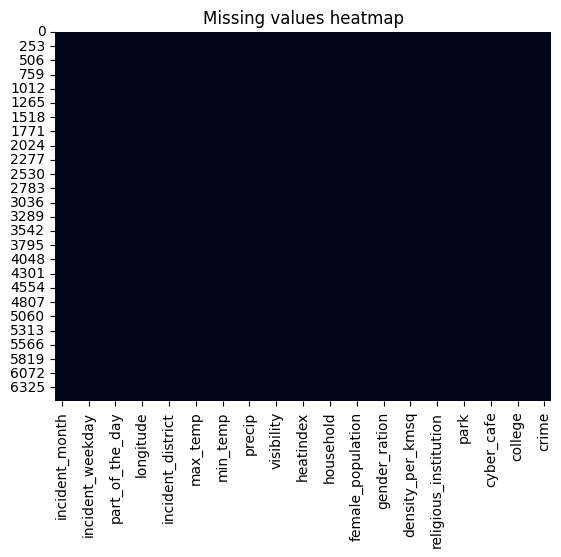

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing values heatmap")
plt.show()

In [ ]:
#Unique values
print(df.nunique())



incident_month             12
incident_week              53
incident_weekday            7
weekend                     2
part_of_the_day             5
latitude                  498
longitude                 487
incident_place            660
incident_district          64
incident_division           9
max_temp                   28
avg_temp                   25
min_temp                   23
weather_code               21
precip                    475
humidity                   84
visibility                  7
cloudcover                 99
heatindex                  29
season                      3
household                 454
male_population           455
female_population         455
total_population          455
gender_ration              34
average_household_size    164
density_per_kmsq          386
literacy_rate             265
religious_institution     378
playground                106
park                       11
police_station             17
cyber_cafe                 28
school    

In [ ]:
# For numerical features
print(df.describe())

# For categorical features
print(df.describe(include=['object']))


       incident_month  incident_week      weekend     latitude    longitude  \
count     6574.000000    6574.000000  6574.000000  6574.000000  6574.000000   
mean         6.193185      25.193946     0.273806    23.889900    90.213444   
std          3.321934      14.517965     0.445944     1.051299     1.004609   
min          1.000000       1.000000     0.000000    20.866700    88.141700   
25%          3.000000      13.000000     0.000000    23.180315    89.375000   
50%          6.000000      25.000000     0.000000    23.858330    90.268302   
75%          9.000000      37.000000     1.000000    24.585009    90.652500   
max         12.000000      53.000000     1.000000    26.482740    92.437760   

          max_temp     avg_temp     min_temp  weather_code       precip  ...  \
count  6574.000000  6574.000000  6574.000000   6574.000000  6574.000000  ...   
mean     32.673258    29.214481    24.114694    222.257225     6.187998  ...   
std       3.452756     3.511377     3.982991    

In [ ]:
# Before removing duplicates
print("Rows before removing duplicates:", len(df))

# Remove duplicates
df = df.drop_duplicates()

# After removing duplicates
print("Rows after removing duplicates:", len(df))


Rows before removing duplicates: 6574
Rows after removing duplicates: 6189


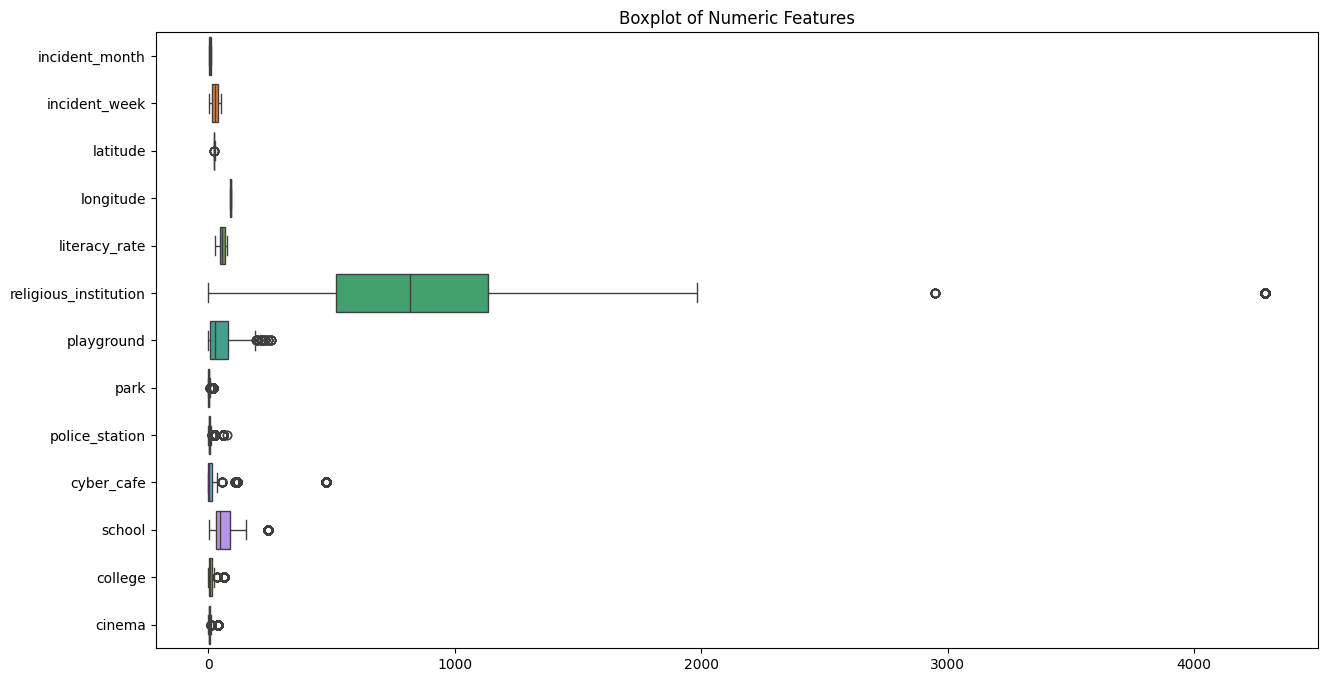

In [ ]:
numeric_features = ['incident_month','incident_week','latitude','longitude',
                    'literacy_rate','religious_institution','playground','park',
                    'police_station','cyber_cafe','school','college','cinema']

# Plot boxplots
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numeric_features], orient='h')
plt.title("Boxplot of Numeric Features")
plt.show()

In [ ]:
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN
    df[col] = df[col].apply(lambda x: np.nan if (x < lower_bound or x > upper_bound) else x)

In [ ]:
# Check unique crime values
print(df['crime'].unique())


['murder' 'rape' 'assault' 'bodyfound' 'kidnap' 'robbery']


In [ ]:
# Count of each class
print(df['crime'].value_counts())


crime
bodyfound    1458
murder       1415
rape         1103
assault      1051
kidnap        607
robbery       555
Name: count, dtype: int64


In [ ]:
categorical_cols = ['incident_weekday', 'part_of_the_day', 'incident_district', 'incident_place']
for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())



Unique values in incident_weekday:
['wednesday' 'tuesday' 'friday' 'thursday' 'sunday' 'saturday' 'monday']
Unique values in part_of_the_day:
['morning' 'night' 'evening' 'noon' 'afternoon']
Unique values in incident_district:
['dhaka' 'gazipur' 'chattogram' 'rajshahi' 'khulna' 'sirajganj'
 'narsingdi' 'lakshmipur' 'manikganj' 'patuakhali' 'jashore' 'sunamganj'
 'bhola' 'satkhira' 'gopalganj' 'habiganj' 'rangpur' 'tangail' 'sylhet'
 'dinajpur' 'kurigram' 'rangamati' 'lalmonirhat' 'barisal' 'brahmanbaria'
 'joypurhat' 'chuadanga' 'bandarban' 'barguna' 'narayanganj' 'pabna'
 'netrokona' 'naogaon' 'panchagarh' 'kishoreganj' 'bagerhat' 'rajbari'
 'natore' 'moulvibazar' 'noakhali' 'mymensingh' 'pirojpur' 'faridpur'
 'kushtia' 'chapainawabganj' 'bogura' 'jamalpur' 'comilla' 'coxsbazar'
 'feni' 'khagrachhari' 'nilphamari' 'chandpur' 'gaibandha' 'meherpur'
 'jhenaidah' 'thakurgaon' 'narail' 'jhalakathi' 'munshiganj' 'madaripur'
 'magura' 'sherpur' 'shariatpur']
Unique values in incident_place:

In [ ]:
df['incident_district'] = df['incident_district'].str.lower().str.strip()


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)


In [ ]:
for col in numerical_cols:
    mean_val = df[col].mean()
    df[col] = df[col].fillna(mean_val)
